<img src="images/neuralB.png" style="width:200px" align="left"> 
<img src="images/logo-uniba.png" style="width:200px" align="right"> 
<img src="images/pyt.png" style="width:70px" align="right"> 
<br />
<br />
<br />
<br />
<br />


# Applicazione di DEEP LEARNING con python 
# 11/12/2019
Cristina Muschitiello - Infocamere, FAO, CREA

https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

## Importazione di tensorflow

In [35]:
import tensorflow as tf
tf.__version__

'2.0.0'

## Importazione dei dati

Il database **MNIST** (*Modified National Institute of Standards and Technology database*) è una vasta base di dati di cifre scritte a mano che è comunemente impiegata come insieme di addestramento in vari sistemi per l'elaborazione delle immagini.
Contiene 60.000 immagini di addestramento e 10.000 immagini di testing.

In [36]:
mnist = tf.keras.datasets.mnist

In [37]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

I dati caticati sono un array di valori.
Vediamoli:

In [38]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

Il nostro obiettivo è dare in pasto qusti array a una rete neurale ed ottenere un risultato.
Prima però vediamo questi dati in un formato più visuale:

In [39]:
import matplotlib.pyplot as plt

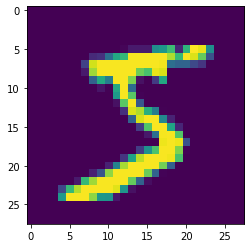

In [40]:
plt.imshow(x_train[0])

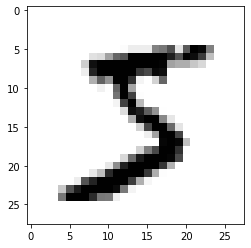

In [41]:
plt.imshow(x_train[0], cmap = plt.cm.binary)

## Normalizzazione

I dati sono in scala di grigi perciò, in RGB, vanno da 0 a 255. 
Per prima cosa normalizziamoli per averli fra 0 e 1. 
In altre parola scaliamo i valori.


In [42]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [43]:
print(x_train[6])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

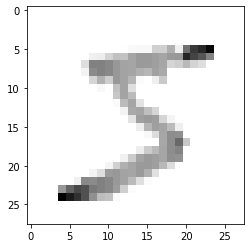

In [44]:
plt.imshow(x_train[0], cmap = plt.cm.binary)

## Costruzione del modello

Per questo esempio construiremo un modello **sequenziale**.
Un modello sequenziale è molto semplice ed è anche fra i più comuni. *"Sequenziale"* significa un modello che procede in ordine da sinistra a destra.

Costruiamo dapprima un modello vuoto e poi aggiungeremo i vari strati della nostra rete:

In [45]:
model = tf.keras.models.Sequential()

## Creazione degli strati

### Lo strato di input

Il primo strato da aggiungere è lo strato di input. Essendo la nostra immagine di 28x28 (=784), il primo strato da inserire sarà un array piatto di 1x784.

*Keras* dispone di una funzione *Flatten()* per *"appiattire i dati"*:

<img src="images/flatten.png" style="width:350px" align="left"> 


In [46]:
model.add(tf.keras.layers.Flatten())

### Gli strati nascosti

Useremo il tipo di strato più semplice, quello **Denso**, ovvero uno strsto connesso in modo denso ai precedenti: ogni nodo è colegato a tutti i nodi degli strati precedenti e successivi. Uno strato denso è uno strato *fully-connected*.

<img src="images/dense.png" style="width:350px" align="left"> 


In [47]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

**128** è ul numero di neuroni. 
La **funzione di attivazione** è la funzione ReLU.


<img src="images/relu.png" style="width:350px" align="left"> 

Costruiamo un secondo strato nascosto uguale al precedente:

In [48]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

### Lo strato di output

Quindi aggiungiamo un layer di output. 
Useremo un layer di **10**, tanti quanti sono i numeri fra i quali stiamo cercando di discriminare.

In [49]:
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

## Compilazione del modello

Realizziamo un modello che utilizza una funzione di ottimizzazione ***ADAM*** (*Adaptive Moment optimization*). 
Questa è una funzione standard e una delle più utilizzate. Insieme alla funzione di attivazione *ReLU* rappresenta il set base per una rete neurale.

Un elenco di possibili funzioni di attivazione è contenuto a [questo link](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6)

Inoltre usiamo una funzione di perdita di tipo ***Sparse crossentropy***. Ricordiamo che le reti neurali sono concentrate sul concetto di "minimizzazione della perdita", piuttosto che sulla "massimizzazione dell'accuratezza". 
Anche in questo caso usiamo una funzione standard e molto comune per questo tipo di problemi di classificazione.

A [questo link](https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/) c'è un articolo contenente suggerimenti per la selta delle funzioni di perdita


In [50]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Fit del modello

In [51]:
model.fit(x_train, y_train, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2640 - accuracy: 0.9226
Epoch 2/3
60000/60000 [==============================] - 3s 54us/sample - loss: 0.1082 - accuracy: 0.9667
Epoch 3/3
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0730 - accuracy: 0.9766


Mentre il modell si allena, vediamo che la perdita descresce e l'accuracy, invece, cresce.

Avere accuracy elevata e perdita bassa significa che il nostro modello ha imparato a classificare i numeri in modo accurato e possiamo aspettarci una elevata capacità di riconoscimento delle immagini. Bisogna però accertarsi che non ci sia la presenza di ***overfitting***, ovvero vogliamo verificare che il modello non abbia invece solo memorizzato alla perfezione tutti i 60000 numro che abbiamo usato per allenarlo. 

Per accertarci di ciò, dobbiamo provare il modello su un altro insieme di dati: i dati di test che abbiamo tenuto separati fino a questo momento.

In [55]:
val_loss, val_acc = model.evaluate(x_test, y_test)


10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [54]:
print(val_loss)
print(val_acc)

0.10222866653185338
0.9683


Questi valori sono un po' diversi da quelli calcolati dal modello.
Questo c'è da aspettarselo.
Ad ogni modo i valori sono ottimi. ù

## Savataggio del modello 

In [56]:
model.save('epic_num_reader.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [57]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

## Uso del modello per fare previsioni

**Keras** offre la possibilità di fare previsioni in modo semplificato utilizzando *.predict()*

In [60]:
predictions = new_model.predict(x_test)

L'output delle previsioni nono è molto intrpretabile visto nel suo formato array:

In [61]:
print(predictions)

[[9.20653387e-10 1.40859163e-06 4.16333278e-05 ... 9.99823868e-01
  5.62357400e-07 6.30487079e-07]
 [2.98958996e-10 1.96307796e-04 9.99802530e-01 ... 2.52436648e-11
  3.60275507e-08 3.05915952e-11]
 [7.99676130e-08 9.98667836e-01 3.73255316e-05 ... 6.89687498e-04
  3.40229977e-04 8.58204749e-06]
 ...
 [5.81765480e-09 1.09061325e-07 5.85984274e-08 ... 1.66039968e-06
  4.43034878e-07 4.40071635e-05]
 [6.21144318e-06 3.53507494e-06 1.07031519e-06 ... 2.75982507e-06
  2.81789456e-03 8.44847960e-08]
 [2.51974743e-08 4.95218657e-08 2.71695126e-06 ... 9.94355900e-12
  4.25125080e-07 2.61233197e-07]]


## Visualizzazione dei dati di output

Per vedere i dati possiamo usare *agrmax()* di **numpy**. 

Questa funzione riconose l'indice del valore massimo dell'array, ovvero la nostra previsione.

In [62]:
import numpy as np

print(np.argmax(predictions[0]))

7


Per comprendere se la previsione è corretta, vediamo qual'era l'input in posizione 0

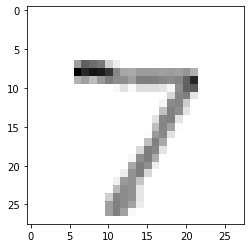

In [63]:
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()

<img src="images/gretJ.jpg" style="width:400px" align="left"> 
